# Decision Tree #

#### Step 0: <font color='red'> IMPORTANT! </font> Intall one more dependency
Before running the code below, you need to install one more dependency, graphviz. <br>
First open command line window and run these two commands:

In [ ]:
pip install graphviz
conda install graphviz

#### Step 1: Understand the dataset and our task

Dataset bc_wisc.csv contains data on breast cancer tumors from a cohort of patients in Wisconsin. The rows are tumor samples, and the columns are different features/variables/attributes about the tumor. The first column contains sample ID, which we don't need to train our model. The second column, 'diagnosis', says whether the given tumor was benign = 0 or malignant = 1. The third column + the rest have measurement of the tumor morphology (e.g. size measured by radius_mean). We will use the features on tumor morphology to train a decision tree that will predict whether the tumor was benign or malignant.

#### Step 2: Load the dataset

In [1]:
import numpy as np

data = np.loadtxt('bc_wisc.csv',delimiter=',',skiprows=1) #skipping header row which contains column names
X = data[:,2:]  # Use 3rd, 4th, ..., last column, as our features, X.
                # Note that we start counting at 0, so that's why it is 2: rather than 3:
y = data[:,1]   # Use 2nd column (diagnosis) as our response variable, the thing we're trying to predict. 
n = X.shape[0]  # n = number of rows/samples in the dataset

#### Step 3: Split the dataset to trainset and testset

In [2]:
n_train = int(n*0.6) # We'll use roughly 60% of our dataset to train, the rest to test the model's performance
X_train = X[0:n_train,:]
y_train = y[0:n_train]
X_test = X[n_train:,:]
y_test = y[n_train:]

#### Step 4: Train a decision tree to predict diagnosis from tumor morphology

In [3]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

#### Step 5: Visualize the decision tree

In [4]:
import graphviz

# First, some logistical things..
# Load in the feature/column names:
f = open('bc_wisc.csv')
column_names = f.readline().strip().split(',')
f.close()
feature_names = column_names[2:]
# Specify what 0 and 1 means in our response variable so that
# the rendered decision tree is more readable
target_names = ['benign','malignant'] # 0 = benign tumor, 1 = malignant tumor

# Render the decision tree into a PDF file
model_info = tree.export_graphviz(model, out_file=None,
                                  feature_names=feature_names, 
                                  class_names=target_names,
                                  filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(model_info)
graph.render("decision_tree_bc_wisc",view=True)

'decision_tree_bc_wisc.pdf'

#### Step 6: Make predictions on the testset, see how well the model performs

In [8]:
from sklearn.metrics import confusion_matrix

# Now we make predictions:
y_predict = model.predict(X_test)

# See how many we got 'right'. 
# Note that negative = benign, positive = malignant, even though malignant tumor doesn't seem like a 'positive' thing.
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test, y_predict).ravel()
print('True negative: '+ str(true_negative))
print('False positive: ' + str(false_positive))
print('False negative: ' + str(false_negative))
print('True_positive: ' + str(true_positive))

True negative: 131
False positive: 11
False negative: 8
True_positive: 74


#### Step 7: Plot the test results

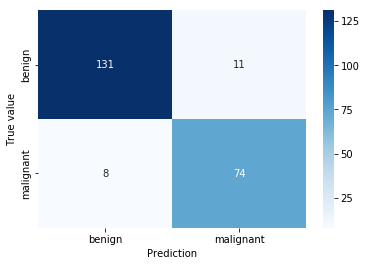

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

test_result = np.array([[true_negative, false_positive],[false_negative, true_positive]])
ax = sns.heatmap(test_result,cmap='Blues',annot=True,fmt='d')
ax.set_xlabel('Prediction')
ax.set_ylabel('True value')
ax.set_xticklabels(target_names)
ax.set_yticklabels(target_names,va='center')
plt.show()